# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [59]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt
import pylab as plt
import numpy as np

import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor as RFR    # el modelo , el alias es cosa mia

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia

from sklearn.datasets import load_diabetes   # dataset

from sklearn.metrics import mean_squared_error as mse    # alias mio

from sklearn.metrics import mean_squared_log_error as msle # con logaritmos

from sklearn.metrics import r2_score as r2

from sklearn.linear_model import LogisticRegression as LogReg

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.metrics import accuracy_score as acc

from sklearn.metrics import precision_score as prec

from sklearn.metrics import recall_score as rec

from sklearn.metrics import f1_score as f1

from sklearn.metrics import confusion_matrix as cm

from sklearn.metrics import roc_curve as roc

from sklearn.metrics import roc_auc_score as auc

from sklearn.metrics import cohen_kappa_score as kappa

from sklearn.datasets import load_wine

from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV  

from sklearn.model_selection import RandomizedSearchCV  # este es random

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

## Regression Model Evaluation

In [60]:
from sklearn.datasets import fetch_california_housing

#.fetch_california_housing

data = fetch_california_housing()



In [61]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV']) # MEDV es nuestro objetivo

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [62]:
data.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
X.head()  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [64]:
y.head() # MEDV es nuestro objetivo

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [65]:
y.value_counts()

MEDV   
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.83000      1
3.83100      1
3.83200      1
0.36600      1
0.56300      1
Name: count, Length: 3842, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = tts(X, 
                                       y,
                                       train_size = 0.8,
                                       test_size = 0.2,
                                       random_state=33)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [67]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg() 

linreg.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred_train = linreg.predict(X_train) #pred entrenamiento
y_pred_test = linreg.predict(X_test) #pred  test
y_pred_train[:5], y_pred_test[:5] 

(array([[1.86828186],
        [2.35931853],
        [1.83027346],
        [1.44016634],
        [2.14935386]]),
 array([[3.31152432],
        [1.16268064],
        [3.40314423],
        [1.48060485],
        [2.24417829]]))

## 3. Calculate and print R-squared for both the training and the testing set.

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.6011597600548197, 0.6255952434969316)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [71]:
mse_train = mse(y_train, y_pred_train)
mse_test = mse(y_test, y_pred_test)
mse_train ,  mse_test

(0.5282607535880394, 0.5090675521928322)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [72]:
from sklearn.metrics import mean_absolute_error as mae

In [73]:
mae_train = mae(y_train, y_pred_train)
mae_test = mae(y_test, y_pred_test)
mae_train, mae_test

(0.5308015887597426, 0.5304117373279987)

## Classification Model Evaluation

In [74]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [75]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
data['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [78]:
X=data.drop('class', axis=1)  # separacion X y
y=data['class']

In [79]:
X_train, X_test, y_train, y_test = tts(X, 
                                       y,
                                       train_size = 0.8,
                                       test_size = 0.2,
                                       random_state=33)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

y_pred_test[:5], y_pred_train[:5]

(array([1, 1, 0, 1, 2]), array([1, 1, 2, 2, 2]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [82]:
accuracy_train = acc(y_train, y_pred_train)
accuracy_test = acc(y_test, y_pred_test)
accuracy_train , accuracy_test

(0.9666666666666667, 0.9333333333333333)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [83]:
from sklearn.metrics import balanced_accuracy_score

In [84]:
balanced_accuracy_score(y_train,y_pred_train) 

0.9656084656084656

In [85]:
balanced_accuracy_score(y_test,y_pred_test)

0.9523809523809524

## 10. Calculate and print the precision score for both the training and the testing set.

In [86]:
precision_train = prec(y_train, y_pred_train, average='macro')

precision_test = prec(y_test, y_pred_test, average='macro')

precision_train ,  precision_test

(0.9656084656084656, 0.9333333333333332)

## 11. Calculate and print the recall score for both the training and the testing set.

In [87]:
recall_train = rec(y_train, y_pred_train, average='macro')

recall_test = rec(y_test, y_pred_test, average='macro')

recall_train ,  recall_test

(0.9656084656084656, 0.9523809523809524)

## 12. Calculate and print the F1 score for both the training and the testing set.

In [88]:
f1_train = f1(y_train, y_pred_train,average='macro')

f1_test = f1(y_test, y_pred_test,average='macro')

f1_train , f1_test

(0.9656084656084656, 0.9373219373219372)

## 13. Generate confusion matrices for both the training and the testing set.

In [89]:
from sklearn.metrics import confusion_matrix 

In [90]:
cm_test = cm(y_test, y_pred_test)

cm_train = cm(y_train, y_pred_train)

cm_test , cm_train

(array([[ 8,  0,  0],
        [ 0,  8,  0],
        [ 0,  2, 12]], dtype=int64),
 array([[42,  0,  0],
        [ 0, 40,  2],
        [ 0,  2, 34]], dtype=int64))

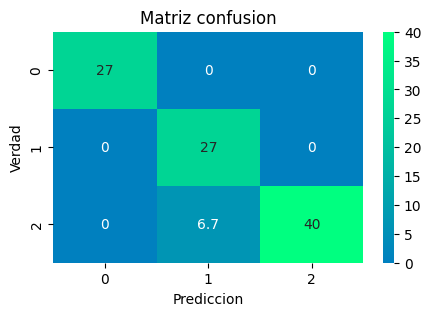

In [91]:
plt.figure(figsize=(5, 3))

sns.heatmap(confusion_matrix(y_test, y_pred_test)/confusion_matrix(y_test, y_pred_test).sum() * 100, 
               annot=True,
               cmap='winter',
               center = 0 )

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

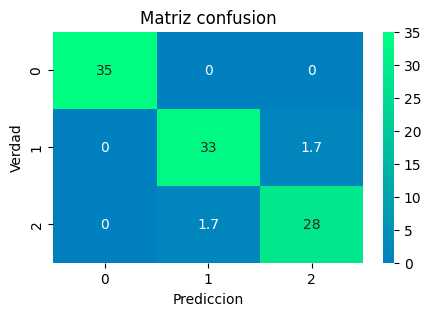

In [93]:
plt.figure(figsize=(5, 3))

sns.heatmap(confusion_matrix(y_train, y_pred_train)/confusion_matrix(y_train, y_pred_train).sum() * 100, 
               annot=True,
               cmap='winter',
               center = 0 )

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.